In [1]:
%pylab inline
import numpy as np
import pymc3 as pm
import theano.tensor as tt

Populating the interactive namespace from numpy and matplotlib


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
x = np.linspace(-1, 1, 100)
f = lambda x: np.exp(x)*4.+2.5

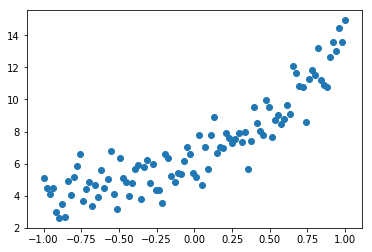

In [3]:
plt.scatter(x, f(x)+np.random.randn(100));

Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
INFO:pymc3:Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
INFO:pymc3:Multiprocess sampling (2 chains in 2 jobs)
NUTS: [a, b]
INFO:pymc3:NUTS: [a, b]
100%|██████████| 1000/1000 [00:01<00:00, 600.11it/s]


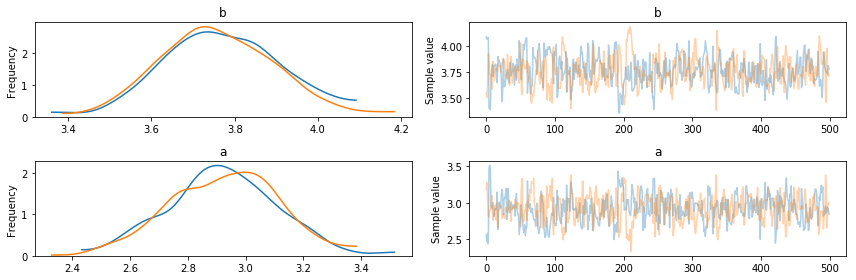

In [8]:
obs = f(x)+np.random.randn(100)
with pm.Model():
    slope = pm.Normal('b', 0., 10.)
    intercept = pm.Normal('a', 0., 10.)
    pm.Normal('obs', tt.exp(x)*slope + intercept, 1, observed=obs)
    trace = pm.sample()
    
pm.traceplot(trace);

Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
INFO:pymc3:Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
INFO:pymc3:Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sd_log__, a, b]
INFO:pymc3:NUTS: [sd_log__, a, b]
100%|██████████| 1000/1000 [00:03<00:00, 327.73it/s]
The acceptance probability does not match the target. It is 0.8896115742141382, but should be close to 0.8. Try to increase the number of tuning steps.


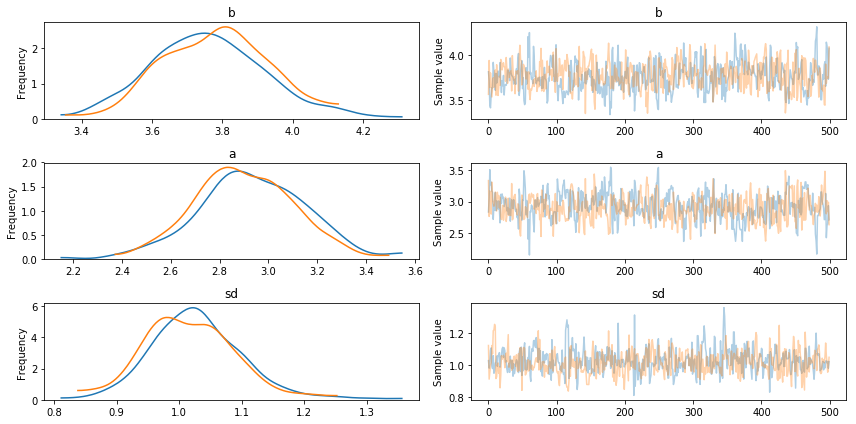

In [9]:
with pm.Model():
    slope = pm.Normal('b', 0., 10.)
    intercept = pm.Normal('a', 0., 10.)
    sigma = pm.HalfCauchy('sd', 5.)
    pm.Normal('obs', tt.exp(x)*slope + intercept, sigma, observed=obs)
    trace = pm.sample()
    
pm.traceplot(trace);

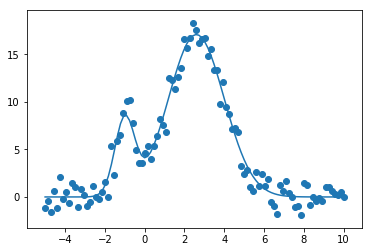

In [28]:
from pymc3.math import logsumexp

def mixture_density(w, mu, sd, x):
    logp = tt.log(w) + pm.Normal.dist(mu, sd).logp(x)
    return tt.sum(tt.exp(logp), axis=1)

x = np.linspace(-5, 10, 100)[:, None]
mu0 = np.array([-1., 2.6])
sd0 = np.array([.5, 1.4])
w0 =np.array([10, 60])
yhat = mixture_density(w0, mu0, sd0, x).eval()
y = yhat + np.random.randn(100)
plt.plot(x, yhat);
plt.scatter(x, y);


Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
INFO:pymc3:Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
INFO:pymc3:Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sd_log__, mu, w_log__]
INFO:pymc3:NUTS: [sd_log__, mu, w_log__]
100%|██████████| 1000/1000 [00:03<00:00, 281.66it/s]


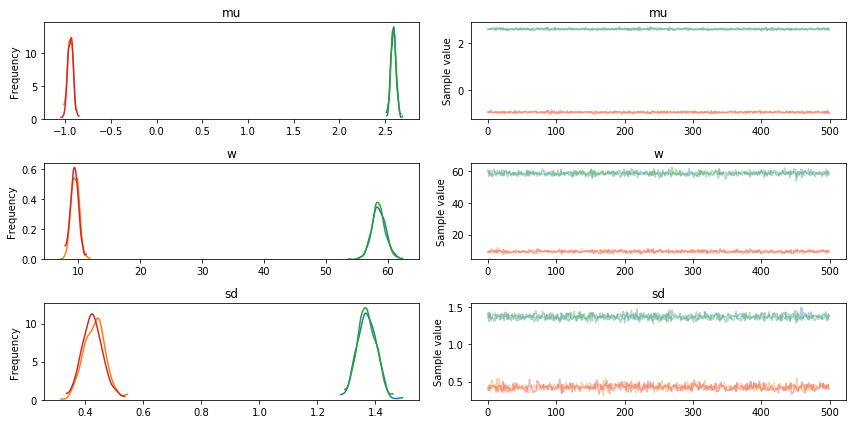

In [36]:
with pm.Model():
    w = pm.HalfNormal('w', 10., shape=2)
    mu = pm.Normal('mu', 0., 100., shape=2)
    sd = pm.HalfCauchy('sd', 5., shape=2)
#     noise = pm.HalfCauchy('eps', 5.)
    pm.Normal('obs', mixture_density(w, mu, sd, x), 1., observed=y)
    trace = pm.sample()
    
pm.traceplot(trace);

Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
INFO:pymc3:Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
INFO:pymc3:Multiprocess sampling (2 chains in 2 jobs)
NUTS: [eps_log__, sd_log__, mu, w_log__]
INFO:pymc3:NUTS: [eps_log__, sd_log__, mu, w_log__]
100%|██████████| 1000/1000 [00:03<00:00, 275.63it/s]


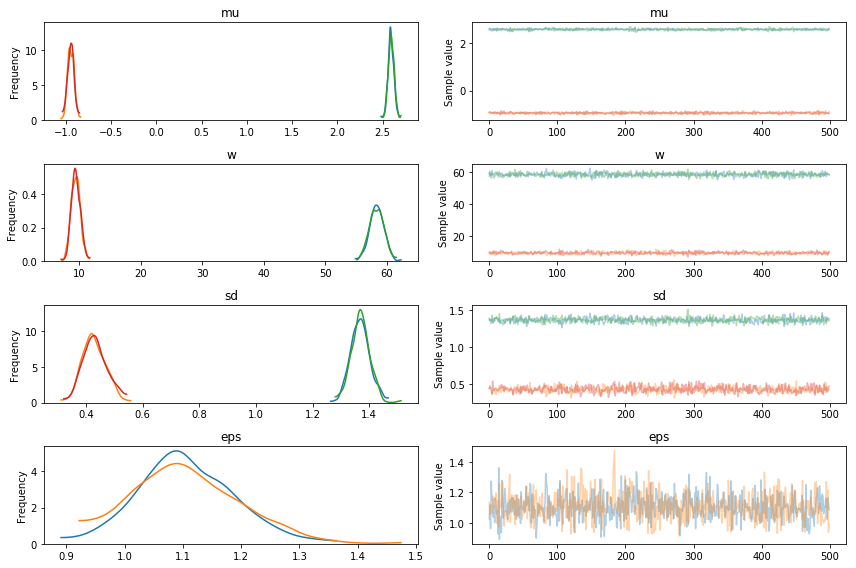

In [37]:
with pm.Model():
    w = pm.HalfNormal('w', 10., shape=2)
    mu = pm.Normal('mu', 0., 100., shape=2)
    sd = pm.HalfCauchy('sd', 5., shape=2)
    noise = pm.HalfNormal('eps', 5.)
    pm.Normal('obs', mixture_density(w, mu, sd, x), noise, observed=y)
    trace = pm.sample()
    
pm.traceplot(trace);